In [1]:
from rowEquation import RowEquation
from scipy.optimize import differential_evolution

In [2]:
rowEquation = RowEquation(M=20, L=-1, T=1)
print(dir(rowEquation))


['A', 'B', 'Cd', 'L', 'M', 'S', 'T', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'calculate_energy', 'calculate_magnitudes', 'coeffs', 'dynamic_edo', 'm', 'mu', 'plot', 'plot_rower_cinematic', 'polinomical_grade', 'rho', 'set_rower_cinematic', 'solution', 'solve_edo', 'summary', 'x', 'x_ddot', 'x_dot', 'y0', 'y0_dot']


[0, 0, -2.0, 0.0, 1]


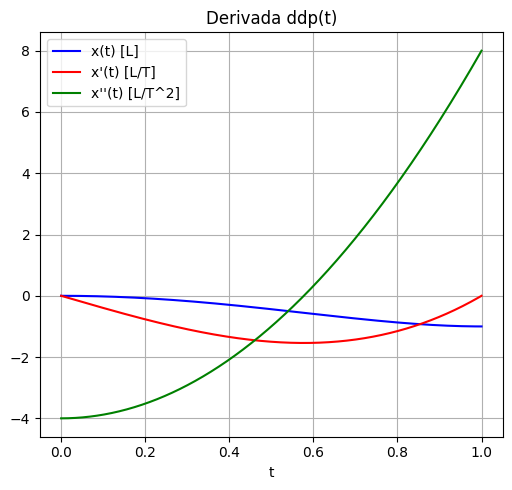

In [3]:
rowEquation.set_rower_cinematic([1])
print(rowEquation.coeffs)
rowEquation.plot_rower_cinematic()
solution = rowEquation.solve_edo()


[0, 0, 3.25, -3.75, 1]


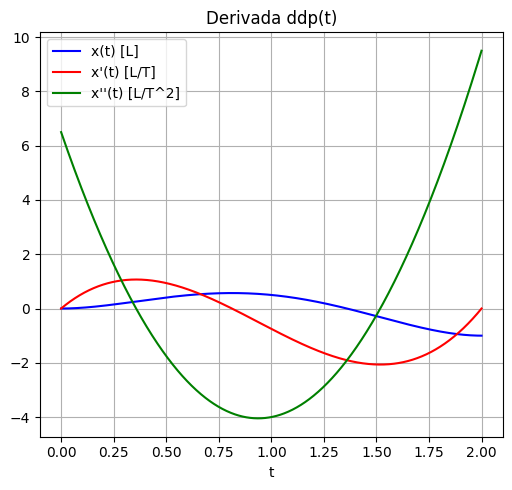

In [4]:
rowEquation.T = 2
rowEquation.set_rower_cinematic([1])
print(rowEquation.coeffs)
rowEquation.plot_rower_cinematic()
solution = rowEquation.solve_edo()


In [5]:
import numpy as np
from scipy.optimize import minimize

# Función objetivo: recibe un vector de parámetros y devuelve el negativo del valor a maximizar
def objetivo(params):
    rowEquation.set_rower_cinematic(list(params))  # Aseguramos que sea lista
    solution = rowEquation.solve_edo(n_t_intervals=50000)
    return -solution['yy_dot'][-1]  # Negamos porque queremos maximizar

# Función para optimizar N parámetros
def optimizar_parametros(initial_guess, bounds=None):
    """
    initial_guess: lista o array de floats, longitud N
    bounds: lista de tuplas (min, max) para cada parámetro, opcional
    """
    result = minimize(
        objetivo,
        x0=np.array(initial_guess),
        bounds=bounds,
        method='L-BFGS-B'  # Funciona bien para varios parámetros con bounds
    )
    
    param_optimos = result.x
    valor_maximo = -result.fun  # Recuperamos el valor original
    return param_optimos, valor_maximo

# --- EJEMPLO DE USO ---
# Optimizar 3 parámetros, con valores iniciales -3, 2, 1
initial_guess = [0]
bounds = [(-10, 10)] # , (-10, 10), (-10, 10), (-10,10)]  # Opcional: límites por parámetro

param_opt, val_max = optimizar_parametros(initial_guess, bounds)

print("Parámetros óptimos:", param_opt)
print("Valor máximo de solution['yy_dot'][-1]:", val_max)


Parámetros óptimos: [-0.51738758]
Valor máximo de solution['yy_dot'][-1]: 8.211988276800154


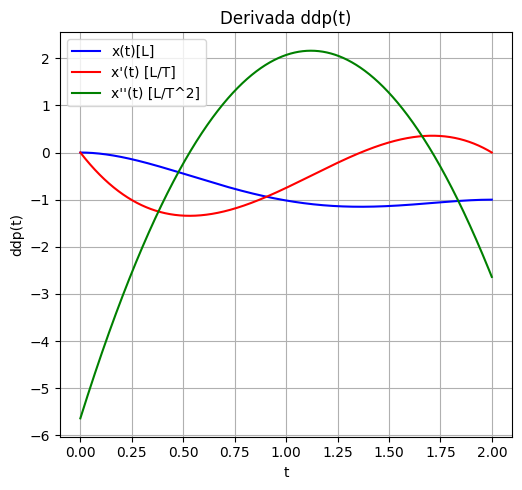

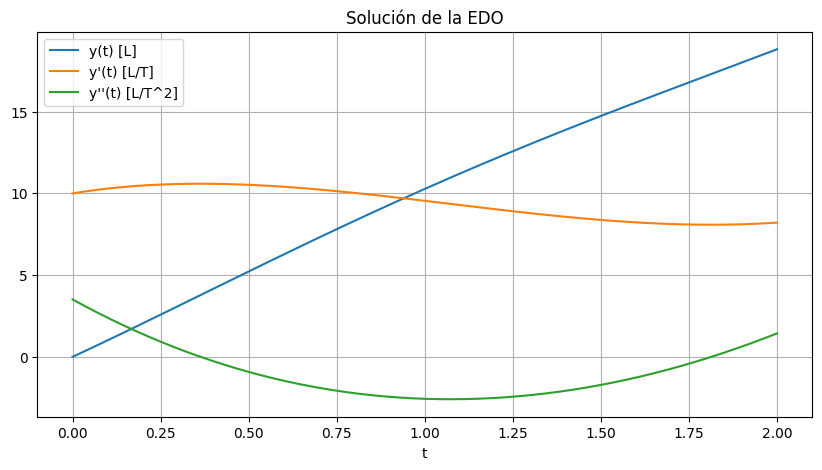

In [6]:
rowEquation.plot()

In [7]:
# from scipy.optimize import differential_evolution

# result = differential_evolution(
#     objetivo,
#     bounds=bounds,
#     strategy='best1bin',
#     maxiter=500,        # 4x más rápido
#     popsize=12,         # población reducida
#     mutation=(0.5, 1.0),
#     recombination=0.7,
#     tol=1e-4,           # tolerancia más laxa
#     polish=False,       # evita refinamiento lento
#     updating='deferred',  # menor latencia
#     workers=-1          # paraleliza
# )

# print(result.x, result.fun)

In [8]:
# def callback(xk, convergence):
#     print(f"Iteración actual: {callback.iter}, "
#           f"Mejor valor: {objetivo(xk):.6f}, "
#           f"Convergencia: {convergence:.2e}")
#     callback.iter += 1

# callback.iter = 0

# res_global = differential_evolution(
#     objetivo,
#     bounds=bounds,
#     strategy='best1bin',
#     maxiter=20,        # 4x más rápido
#     popsize=12,         # población reducida
#     mutation=(0.5, 1.0),
#     recombination=0.7,
#     tol=1e-4,           # tolerancia más laxa
#     polish=False,       # evita refinamiento lento
#     updating='deferred',  # menor latencia
#     callback=callback,
#     workers=1          # paraleliza
# )

# # Etapa 2: refinamiento local preciso
# res_local = minimize(
#     objetivo,
#     res_global.x,
#     method='L-BFGS-B',
#     bounds=bounds
# )

# print(res_local.x, res_local.fun)

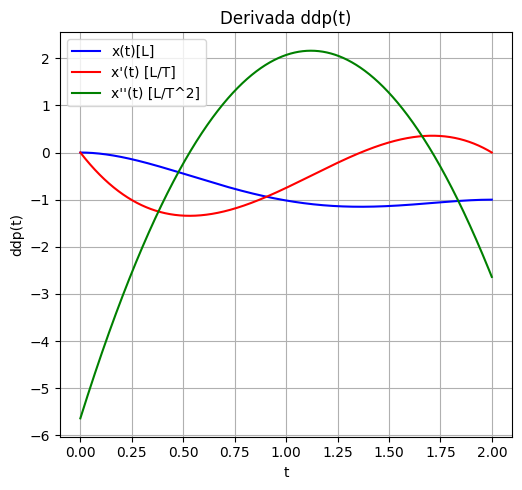

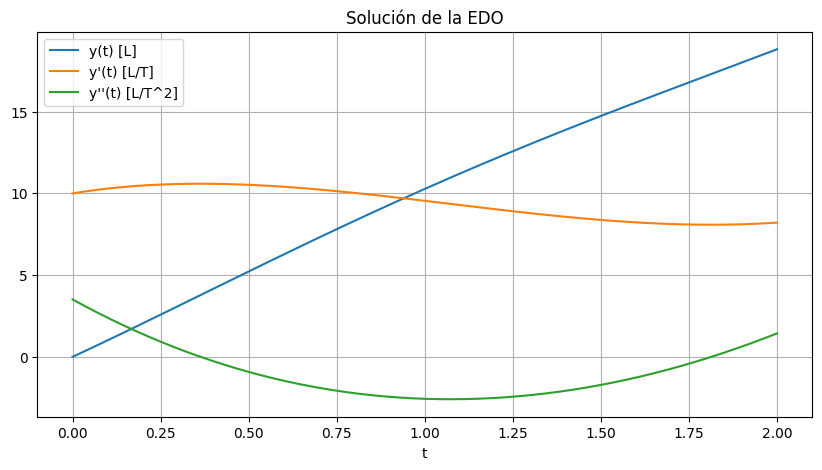

In [9]:
rowEquation.plot()

In [10]:
# import time

# t0 = time.time()
# objetivo([1,1,1])
# t1 = time.time()

# print('tarda en ahcer la edo una vez: ', round(t1-t0, 4))

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt



In [12]:
L = -1     # longitud total (ejemplo)
T = 1     # tiempo total (ejemplo)

# Coeficientes libres del polinomio a partir de grado 4
high_coef = [1]  # Ejemplo

# Orden del polinomio n (automático)
n = len(high_coef) + 3

# Coeficientes base (a0, a1, a2, a3, ...)
# a0, a1 dependen de condiciones iniciales, los libres empiezan desde a4
a_free = high_coef

# Cálculo de a2 y a3 usando las fórmulas dadas
a2 = 3 * L / T**2 + sum((k - 3) * a_free[k - 4] * T**(k - 2) for k in range(4, n + 1))
a3 = -2 * L / T**3 - sum((k - 2) * a_free[k - 4] * T**(k - 3) for k in range(4, n + 1))

coeffs = [0, 0, a2, a3] + a_free
print(f"Orden del polinomio n = {n}")
print(f"coeffs = {coeffs}")

Orden del polinomio n = 4
coeffs = [0, 0, -2.0, 0.0, 1]


In [13]:

# # ----------------------
# # Parámetros del problema
# # ----------------------

# m = 80
# M = 20
# mu = 1/(M+m)
# B = m*mu
# Cd = 0.008 #N s^2 / m^2
# rho = 1000 # kg/m^3
# S = 4


# A = -0.5*S*rho*Cd*mu
# print('A (0.5 S rho Cd mu): ', A, ' B(m/mu): ', B)
# # A = -0.05
# # B = 2
# T = 2.0  # s
# L = -1  # m
# n = 4 # orden del polinomio de modela la cineemática del remero


# n_ = n-3 if n-3>0 else None
# # Coeficientes del polinomio p(t)
# a_free = [-0.88162] #, 0.2,-1,-0.05,0.1]  # n-3 coeficientes libres
# print(n+1)
# a2 = 3*L/T**2 + sum((k-3)*a_free[k-4]*T**(k-2) for k in range(4, n+1))
# a3 = -2*L/T**3 - sum((k-2)*a_free[k-4]*T**(k-3) for k in range(4, n+1))
# high_coeffs =  a_free[:n_] if n_ else []
# coeffs = [0, 0, a2, a3] + high_coeffs
# print(coeffs)
# # ----------------------
# # Funciones p(t) y su segunda derivada
# # ----------------------
# def p(t):
#     return sum(coeffs[k]*t**k for k in range(len(coeffs)))

# def p_ddot(t):
#     return sum(k*(k-1)*coeffs[k]*t**(k-2) for k in range(2, len(coeffs)))

# def p_dot(t):
#     return sum(k*coeffs[k]*t**(k-1) for k in range(1, len(coeffs)))


# # ----------------------
# # EDO de primer orden para v = dy/dt
# # ----------------------
# def dv_dt(t, v):
#     return A*np.abs(v)*v - B*p_ddot(t) # 

# # ----------------------
# # Condiciones iniciales
# # ----------------------
# v0 = 10  # por ejemplo, y'(0)=0
# y0 = 0  # y(0) = 0

# # ----------------------
# # Resolver numéricamente
# # ----------------------
# t_span = (0, T)
# t_eval = np.linspace(0, T, 400000)

# sol = solve_ivp(lambda t, y: [dv_dt(t, y[0]), y[0]], t_span, [v0, y0], t_eval=t_eval)

# v_vals = sol.y[0]  # y'(t)
# y_vals = sol.y[1]  # y(t)
# ddy_vals = A * v_vals**2 - B * np.array([p_ddot(ti) for ti in t_eval])

# print(v_vals.shape, y_vals.shape)
# t_eval = np.linspace(0, T, v_vals.shape[0])
# # ----------------------
# # Graficar
# # ----------------------

# t_vals = np.linspace(0, T, 400)
# p_vals = p(t_vals)
# p_d_vals = p_dot(t_vals)
# p_dd_vals = p_ddot(t_vals)

# plt.figure(figsize=(10,5))

# plt.subplot(1,2,1)
# plt.plot(t_vals, p_vals, label='p(t)', color='blue')
# plt.xlabel('t')
# plt.ylabel('p(t)')
# plt.title('Polinomio p(t)')
# plt.grid(True)
# plt.legend()

# plt.subplot(1,2,1)
# plt.plot(t_vals, p_d_vals, label="dp(t)", color='red')
# plt.xlabel('t')
# plt.ylabel("dp(t)")
# plt.title('Derivada dp(t)')
# plt.grid(True)
# plt.legend()

# plt.subplot(1,2,1)
# plt.plot(t_vals, p_dd_vals, label="ddp(t)", color='green')
# plt.xlabel('t')
# plt.ylabel("ddp(t)")
# plt.title('Derivada ddp(t)')
# plt.grid(True)
# plt.legend()

# plt.tight_layout()
# plt.show()


# plt.show()
# plt.figure(figsize=(10,5))
# plt.plot(t_eval, y_vals, label='y(t)')
# plt.plot(t_eval, v_vals, label="y'(t)")
# plt.plot(t_eval, ddy_vals, label = "y''(t)")
# plt.xlabel('t')
# plt.ylabel('y / y\'')
# plt.title('Solución de la EDO')
# plt.legend()
# plt.grid(True)
# plt.show()
# print('Posicion final del barco: ', round(y_vals[-1],3), 
#       '\nVelocidad final del barco: ', round(v_vals[-1],3))